In [6]:
from pathlib import Path
import pickle
import numpy as np
from sklearn.utils import Bunch

# load preprocessed data
wkdir=Path(".")
with open((wkdir/"preprocessed_data"/"sam_data.pkl"), "rb") as input_file:
    sam_data=pickle.load(input_file)
with open((wkdir/"preprocessed_data"/"yc_data.pkl"), "rb") as input_file:
    yc_data=pickle.load(input_file)

# combine two datasets
combined_data=Bunch()
combined_data.flat_images=np.concatenate((sam_data.flat_images, yc_data.flat_images))
combined_data.target=np.concatenate((sam_data.target, yc_data.target))
combined_data.images=np.concatenate((sam_data.images, yc_data.images))
combined_data.speaker=np.concatenate((np.repeat("M", 600), np.repeat("F", 600)))

Text(0, 0.5, 'Explained variance (cumulative)')

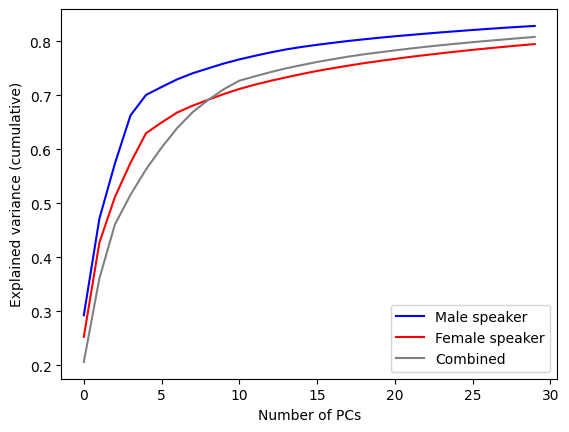

In [15]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

# PCA cumulative explained variance for both speakers separately and combined
pca_sam=PCA().fit(sam_data.flat_images)
pca_yc=PCA().fit(yc_data.flat_images)
pca_combined=PCA().fit(combined_data.flat_images)
fig=plt.figure()
ax=fig.add_subplot()
ax.plot(np.cumsum(pca_sam.explained_variance_ratio_)[:30], color="blue")
ax.plot(np.cumsum(pca_yc.explained_variance_ratio_)[:30], color="red")
ax.plot(np.cumsum(pca_combined.explained_variance_ratio_)[:30], color="grey")
plt.legend(["Male speaker", "Female speaker", "Combined"], loc="lower right")
plt.xlabel("Number of PCs")
plt.ylabel("Explained variance (cumulative)")

Text(0, 0.5, 'PC2')

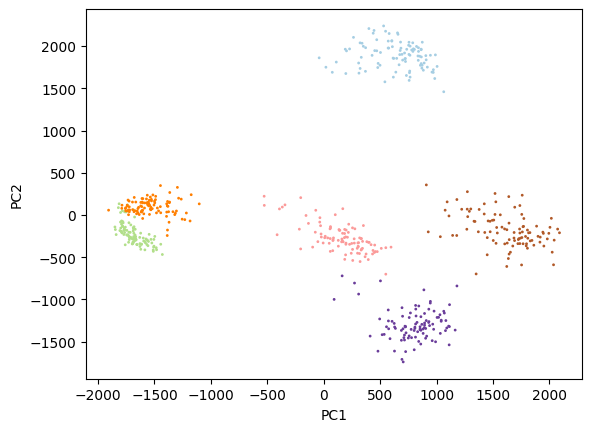

In [74]:
# PCA scatterplot for male speaker, PC1 vs PC2
pca_sam_mapper=PCA().fit_transform(sam_data.flat_images)
colmapper=list(map((lambda x: plt.colormaps.get_cmap("Paired").colors[0] if x=="a" else plt.colormaps.get_cmap("Paired").colors[2] if x=="i" else plt.colormaps.get_cmap("Paired").colors[4] if x=="u" else plt.colormaps.get_cmap("Paired").colors[7] if x=="e" else plt.colormaps.get_cmap("Paired").colors[9] if x=="o" else plt.colormaps.get_cmap("Paired").colors[11] if x=="schwa" else None), sam_data.target))

fig=plt.figure()
ax=fig.add_subplot()
ax.scatter(pca_sam_mapper[:,0], pca_sam_mapper[:,1], c=colmapper, s=1)
plt.xlabel("PC1")
plt.ylabel("PC2")

Text(0, 0.5, 'PC3')

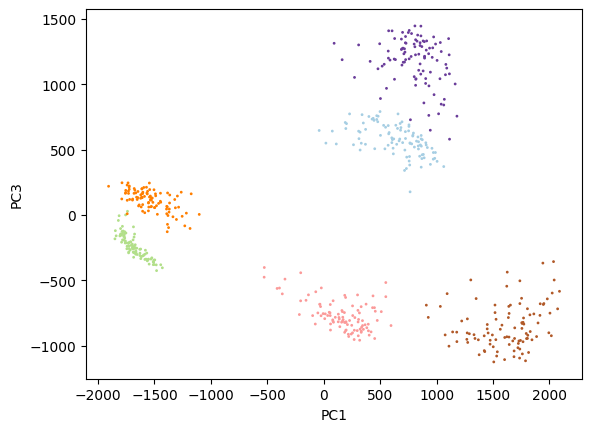

In [17]:
# male speaker, PC1 vs PC3
fig=plt.figure()
ax=fig.add_subplot()
ax.scatter(pca_sam_mapper[:,0], pca_sam_mapper[:,2], c=colmapper, s=1)
plt.xlabel("PC1")
plt.ylabel("PC3")

Text(0, 0.5, 'PC3')

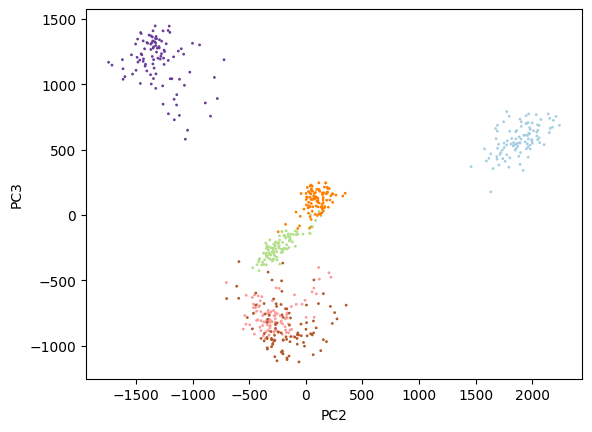

In [18]:
# male speaker, PC2 vs PC3
fig=plt.figure()
ax=fig.add_subplot()
ax.scatter(pca_sam_mapper[:,1], pca_sam_mapper[:,2], c=colmapper, s=1)
plt.xlabel("PC2")
plt.ylabel("PC3")

Text(0, 0.5, 'PC2')

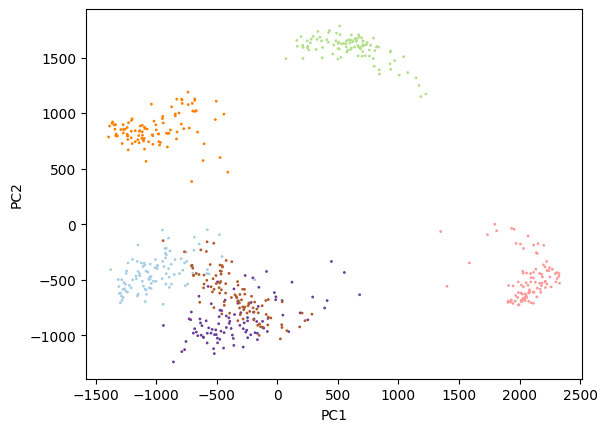

In [19]:
# female speaker, PC1 vs PC2
pca_yc_mapper=PCA().fit_transform(yc_data.flat_images)
colmapper=list(map((lambda x: plt.colormaps.get_cmap("Paired").colors[0] if x=="a" else plt.colormaps.get_cmap("Paired").colors[2] if x=="i" else plt.colormaps.get_cmap("Paired").colors[4] if x=="u" else plt.colormaps.get_cmap("Paired").colors[7] if x=="e" else plt.colormaps.get_cmap("Paired").colors[9] if x=="o" else plt.colormaps.get_cmap("Paired").colors[11] if x=="schwa" else None), yc_data.target))

fig=plt.figure()
ax=fig.add_subplot()
ax.scatter(pca_yc_mapper[:,0], pca_yc_mapper[:,1], c=colmapper, s=1)
plt.xlabel("PC1")
plt.ylabel("PC2")

Text(0, 0.5, 'PC3')

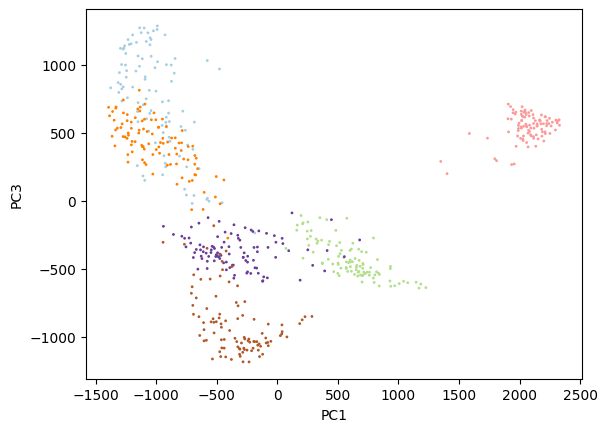

In [20]:
# female speaker, PC1 vs PC3
fig=plt.figure()
ax=fig.add_subplot()
ax.scatter(pca_yc_mapper[:,0], pca_yc_mapper[:,2], c=colmapper, s=1)
plt.xlabel("PC1")
plt.ylabel("PC3")

Text(0, 0.5, 'PC3')

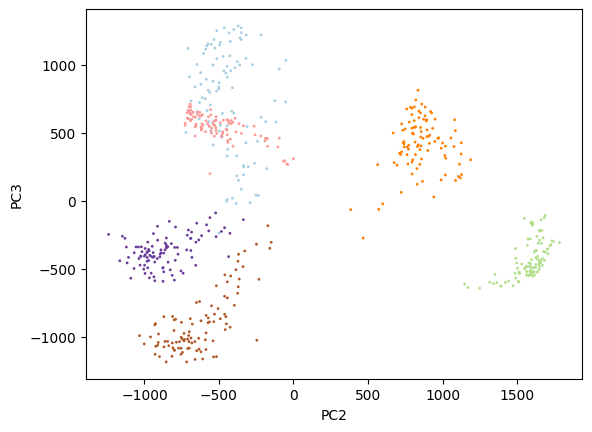

In [21]:
# female speaker, PC2 vs PC3
fig=plt.figure()
ax=fig.add_subplot()
ax.scatter(pca_yc_mapper[:,1], pca_yc_mapper[:,2], c=colmapper, s=1)
plt.xlabel("PC2")
plt.ylabel("PC3")

Text(0, 0.5, 'PC2')

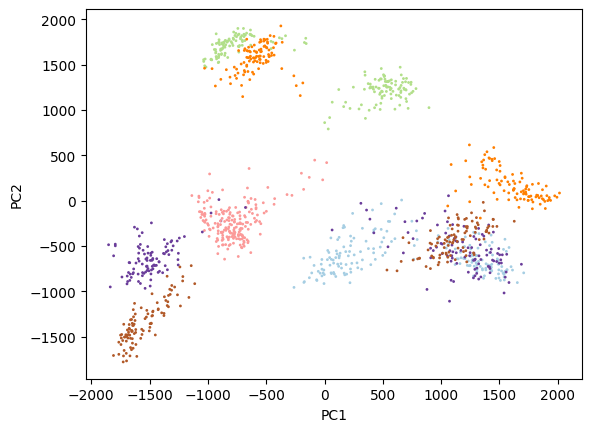

In [22]:
# combined data, PC1 vs PC2
pca_combined_mapper=PCA().fit_transform(combined_data.flat_images)
colmapper=list(map((lambda x: plt.colormaps.get_cmap("Paired").colors[0] if x=="a" else plt.colormaps.get_cmap("Paired").colors[2] if x=="i" else plt.colormaps.get_cmap("Paired").colors[4] if x=="u" else plt.colormaps.get_cmap("Paired").colors[7] if x=="e" else plt.colormaps.get_cmap("Paired").colors[9] if x=="o" else plt.colormaps.get_cmap("Paired").colors[11] if x=="schwa" else None), combined_data.target))

fig=plt.figure()
ax=fig.add_subplot()
ax.scatter(pca_combined_mapper[:,0], pca_combined_mapper[:,1], c=colmapper, s=1)
plt.xlabel("PC1")
plt.ylabel("PC2")

Text(0, 0.5, 'PC3')

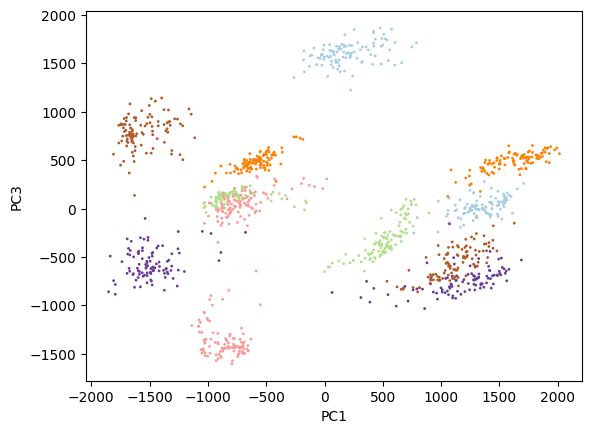

In [23]:
# combined data, PC1 vs PC3
fig=plt.figure()
ax=fig.add_subplot()
ax.scatter(pca_combined_mapper[:,0], pca_combined_mapper[:,2], c=colmapper, s=1)
plt.xlabel("PC1")
plt.ylabel("PC3")

Text(0, 0.5, 'PC3')

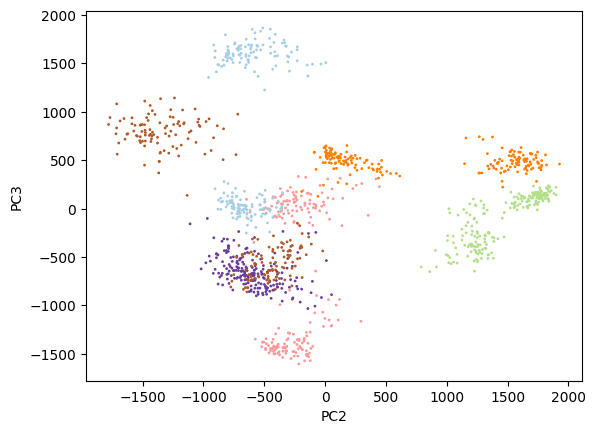

In [24]:
# combined data, PC2 vs PC3
fig=plt.figure()
ax=fig.add_subplot()
ax.scatter(pca_combined_mapper[:,1], pca_combined_mapper[:,2], c=colmapper, s=1)
plt.xlabel("PC2")
plt.ylabel("PC3")

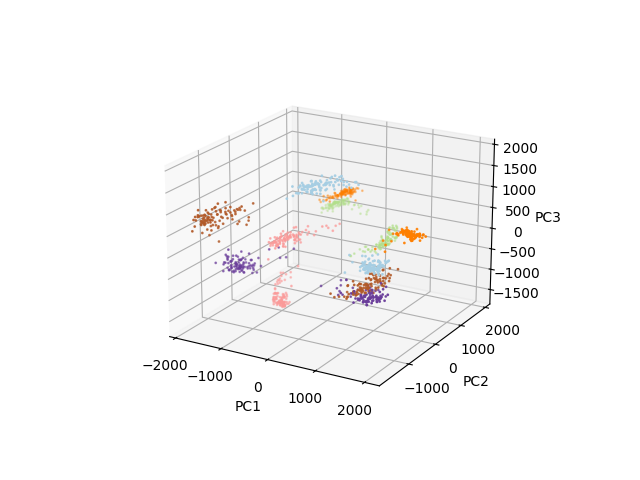

In [37]:
# combined data, interactive 3D plot
%matplotlib widget
from mpl_toolkits.mplot3d import Axes3D

fig=plt.figure()
ax=fig.add_subplot(111, projection="3d", elev=20)
ax.scatter(pca_combined_mapper[:,0], pca_combined_mapper[:,1], pca_combined_mapper[:,2], c=colmapper, s=1)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.show()

In [46]:
# 2D UMAP for both speakers separately, densemap=True preserves local density
# when graph is not fully connected, each run seems to produce slightly different results even with a set random_state
import umap
import umap.plot

mapper_sam=umap.UMAP(densmap=True, random_state=3).fit(sam_data.flat_images)
mapper_yc=umap.UMAP(densmap=True, random_state=3).fit(yc_data.flat_images)

d:\Program Files\Python\Python310\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
d:\Program Files\Python\Python310\lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
d:\Program Files\Python\Python310\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


<Axes: >

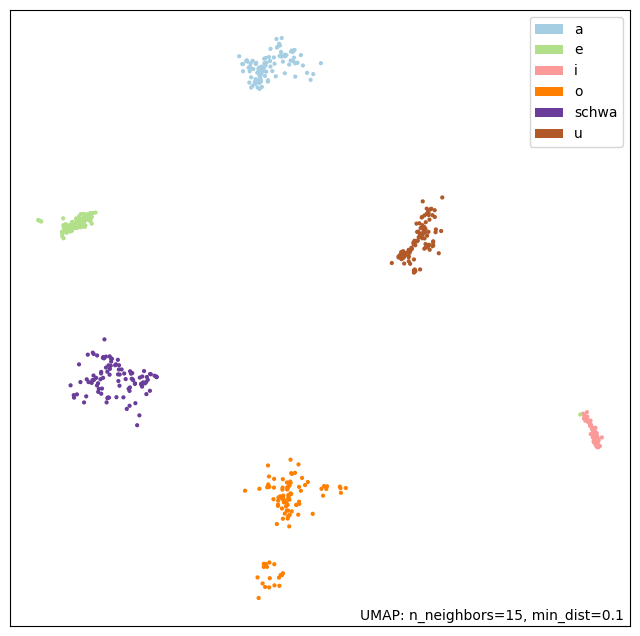

In [47]:
%matplotlib inline

# male speaker
umap.plot.points(mapper_sam, labels=sam_data.target, color_key_cmap="Paired")

<Axes: >

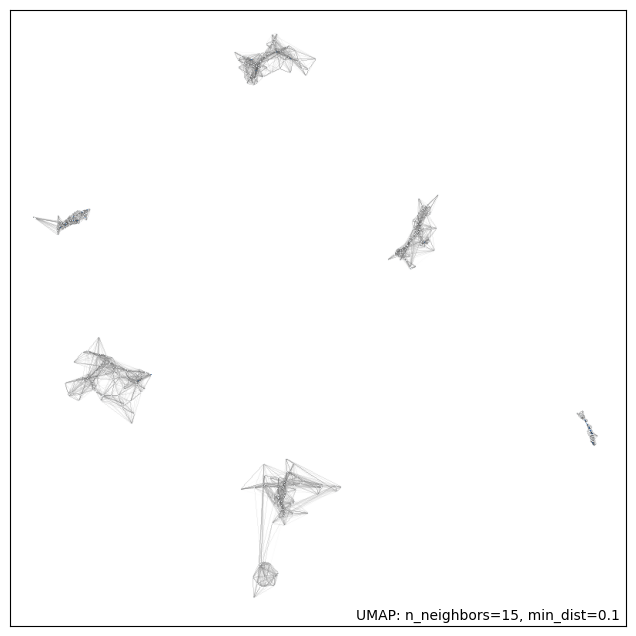

In [48]:
# connectivity plot allows us to see how each cluster is connected
# it also provides a rough visual estimate of the "similarity" between clusters
umap.plot.connectivity(mapper_sam, show_points=True)

<Axes: >

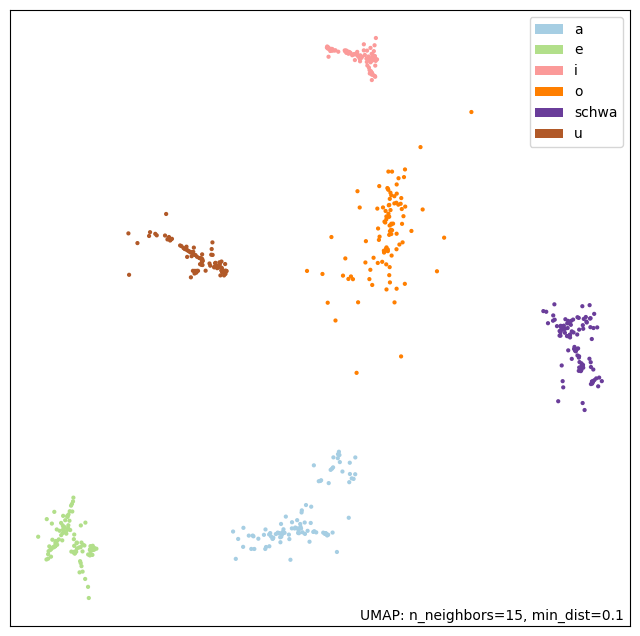

In [49]:
# female speaker
umap.plot.points(mapper_yc, labels=yc_data.target, color_key_cmap="Paired")

<Axes: >

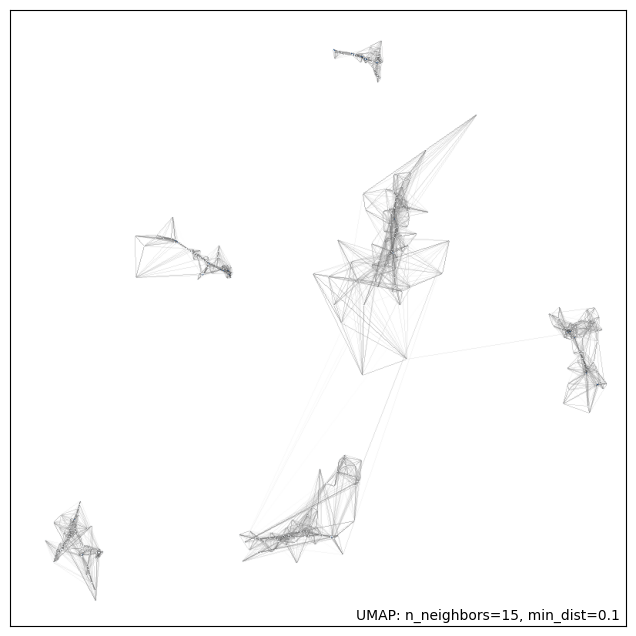

In [50]:
umap.plot.connectivity(mapper_yc, show_points=True)

In [51]:
# 2D UMAP for combined data with default parameters
# again it warns about graph not being fully connected
mapper_combined=umap.UMAP(densmap=True, random_state=3).fit(combined_data.flat_images)

d:\Program Files\Python\Python310\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
d:\Program Files\Python\Python310\lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


<Axes: >

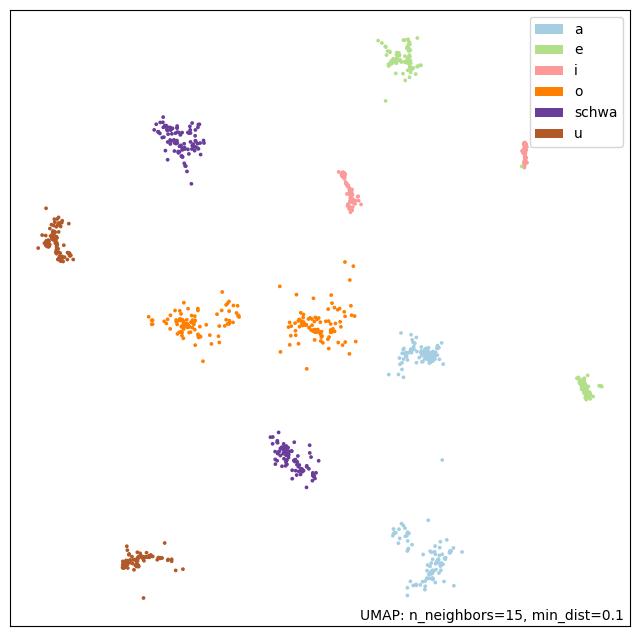

In [52]:
umap.plot.points(mapper_combined, labels=combined_data.target, color_key_cmap="Paired")

<Axes: >

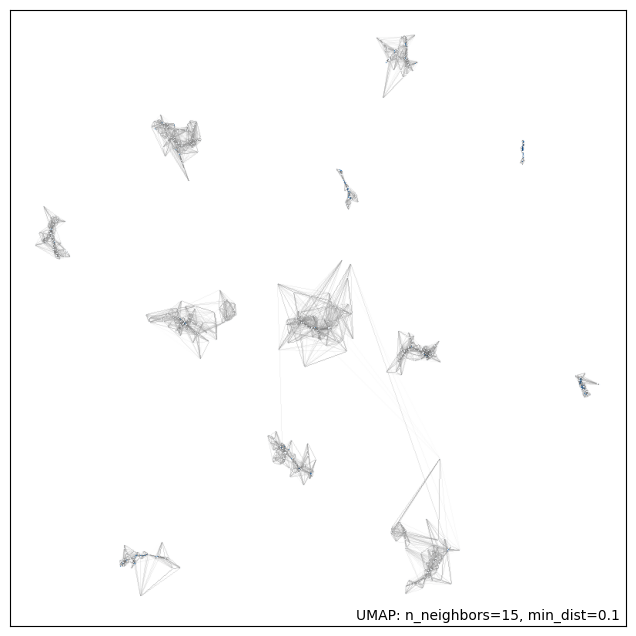

In [53]:
# as expected, most clusters are disconnected
umap.plot.connectivity(mapper_combined, show_points=True)

<Axes: title={'center': 'Colored by approx local dimension'}>

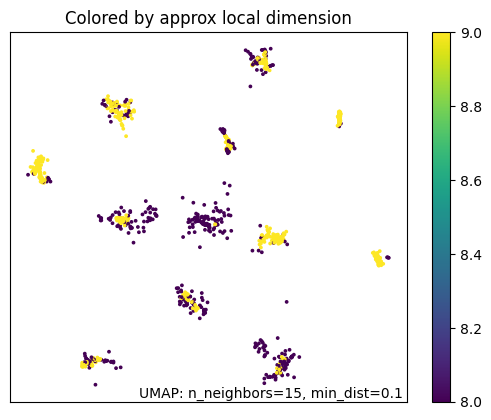

In [54]:
# check local dimensions
# local dimensions of 8 to 9 means a 2D embedding is not enough to capture the data's intrinsic structure
# so we need to be careful when interpreting intra- and inter-cluster structures
# but visually it still seems to do a good job of separating the clusters
umap.plot.diagnostic(mapper_combined, diagnostic_type="local_dim")

In [55]:
# increasing the n_neighbors parameter should give a more connected graph
# and indeed it no longer gives a warning
mapper_combined=umap.UMAP(densmap=True, random_state=3, n_neighbors=300).fit(combined_data.flat_images)

d:\Program Files\Python\Python310\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


<Axes: >

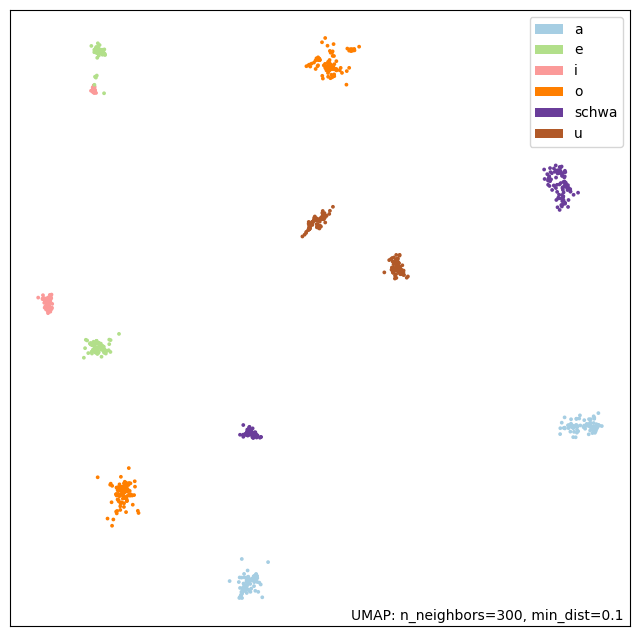

In [56]:
# the clusters seem to have visually shrunk in size
umap.plot.points(mapper_combined, labels=combined_data.target, color_key_cmap="Paired")

<Axes: >

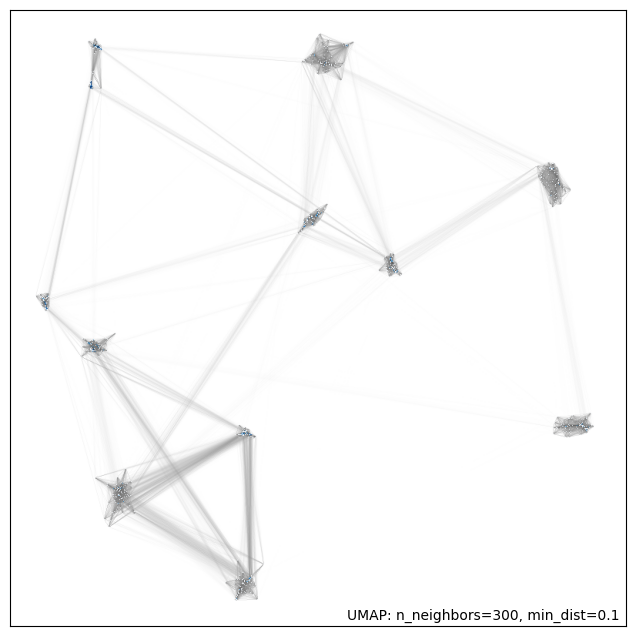

In [57]:
# connectivity seems a lot better
umap.plot.connectivity(mapper_combined, show_points=True)

In [58]:
# cranking up n_neighbors to 1199 (max possible) to see if it makes a difference
mapper_combined=umap.UMAP(densmap=True, random_state=3, n_neighbors=1199).fit(combined_data.flat_images)

d:\Program Files\Python\Python310\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


<Axes: >

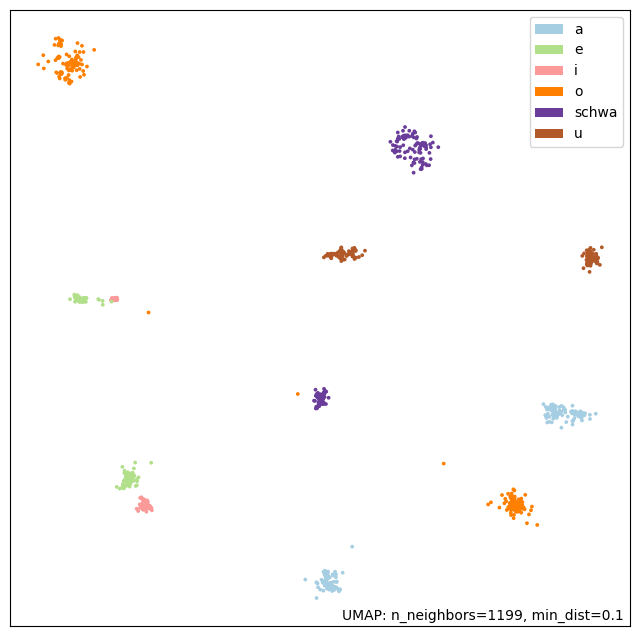

In [113]:
# qualitatively it seems very similar to n_neighbors=300, cluster sizes are also not much different
# but there doesn't appear to be any drawbacks either apart from slightly increased computation time
umap.plot.points(mapper_combined, labels=combined_data.target, color_key_cmap="Paired")

<Axes: >

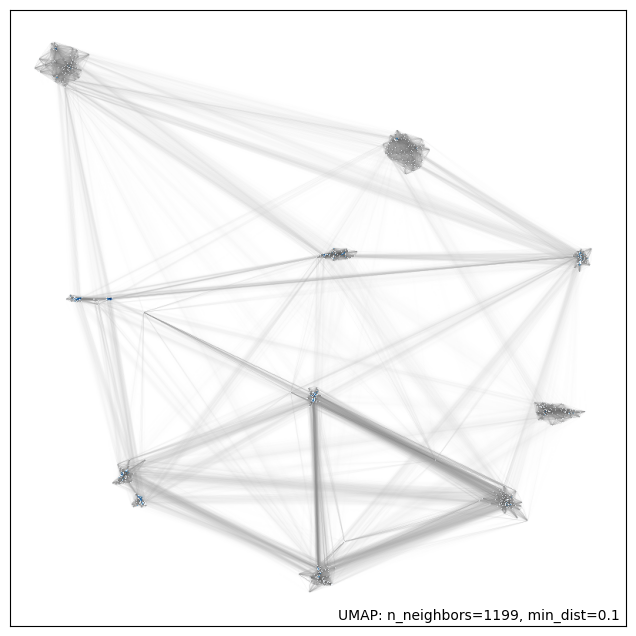

In [71]:
# connectivity seems to be even better
# theoretically speaking a more connected graph should provide a more reliable embedding and also reduce run-to-run variations
umap.plot.connectivity(mapper_combined, show_points=True)

In [59]:
# interactive 3D UMAP for combined data
mapper_combined_3d=umap.UMAP(densmap=True, random_state=3, n_neighbors=1199, n_components=3).fit_transform(combined_data.flat_images)

d:\Program Files\Python\Python310\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


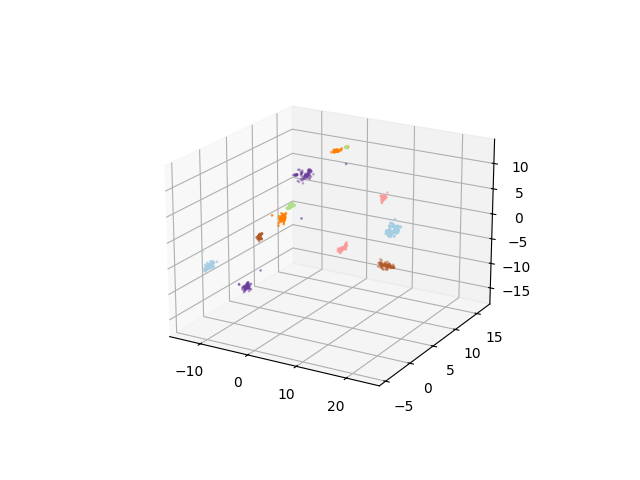

In [61]:
%matplotlib widget
colmapper=list(map((lambda x: plt.colormaps.get_cmap("Paired").colors[0] if x=="a" else plt.colormaps.get_cmap("Paired").colors[2] if x=="i" else plt.colormaps.get_cmap("Paired").colors[4] if x=="u" else plt.colormaps.get_cmap("Paired").colors[7] if x=="e" else plt.colormaps.get_cmap("Paired").colors[9] if x=="o" else plt.colormaps.get_cmap("Paired").colors[11] if x=="schwa" else None), combined_data.target))

# cluster separation is much cleaner than PCA
fig=plt.figure()
ax=fig.add_subplot(111, projection="3d", elev=20)
ax.scatter(mapper_combined_3d[:,0], mapper_combined_3d[:,1], mapper_combined_3d[:,2], c=colmapper, s=1)
plt.show()